In [1]:
# Import core libraries for data handling, plotting, model evaluation, and preprocessing artifacts.
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load processed train and validation datasets, then split features and target for each.
train_path = "train_processed_with_target.csv"
target_col = "price_class"

df = pd.read_csv(train_path)
X_train_df = df.drop(columns=[target_col])
y_train = df[target_col]

print("Train feature shape:", X_train_df.shape)
print("Train label shape:", y_train.shape)

train_path = "train_processed_with_target.csv"
val_path = "val_processed_with_target.csv"

target_col = "price_class"

train_df = pd.read_csv(train_path)
X_train_df = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

val_df = pd.read_csv(val_path)
X_val_df = val_df.drop(columns=[target_col])
y_val = val_df[target_col]

print("Train feature shape:", X_train_df.shape)
print("Train label shape  :", y_train.shape)
print("Val feature shape  :", X_val_df.shape)
print("Val label shape    :", y_val.shape)

display(X_train_df.head())
display(X_val_df.head())

Train feature shape: (32637, 12)
Train label shape: (32637,)
Train feature shape: (32637, 12)
Train label shape  : (32637,)
Val feature shape  : (8270, 12)
Val label shape    : (8270,)


,minimum_nights,number_of_reviews,amenity_score,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.331798,-0.423370,1.925787e+00,-0.766399,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.788883,-1.328274,3.684923e-16,-0.552314,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.945994,-0.875822,-2.056868e-01,-0.223540,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.945994,-0.875822,3.751529e-01,-0.858150,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.945994,0.105965,-2.134904e+00,-0.452917,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


,minimum_nights,number_of_reviews,amenity_score,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.474399,1.664564,0.240315,-0.644065,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.164299,1.690678,-0.190129,0.418716,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.543110,-1.328274,-2.067486,-0.498793,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.894692,-0.875822,-1.009527,-0.766399,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.945994,0.105965,1.785764,1.405037,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# Load raw test data, apply the saved preprocessor, and build processed test features.
test_df = pd.read_csv("test.csv")
y_test = test_df["price_class"].astype(int).values
X_test_df = test_df.drop(columns=["price_class"])
preprocessor = joblib.load("preprocessor.joblib")
X_test = preprocessor.transform(X_test_df).astype(np.float64)
feature_names = preprocessor.get_feature_names_out()
X_test_processed_df = pd.DataFrame(X_test, columns=feature_names, index=test_df.index)
print("Test feature shape:", X_test_processed_df.shape)
print("Test label shape:", y_test.shape)
display(X_test_processed_df.head())

Test feature shape: (7297, 13)
Test label shape: (7297,)


,minimum_nights,number_of_reviews,amenity_score,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_Unknown
0,-0.466136,1.836031,1.678579,1.216107,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.678632,-1.313723,1.429437,0.496606,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.130370,0.562597,2.342956,-0.353018,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.130370,-0.600545,1.320437,-0.850545,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.466136,0.849418,-1.207312,0.527223,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
# Align processed test features to the exact training feature schema and report alignment diagnostics.
train_cols = list(X_train_df.columns)

if "X_test_processed_df" in globals():
    raw_test = X_test_processed_df.copy()
else:
    raw_test = X_test_df.copy()

X_test_eval_df = pd.DataFrame(index=raw_test.index)
missing_cols, ambiguous_cols = [], []

for col in train_cols:
    if col in raw_test.columns:
        X_test_eval_df[col] = raw_test[col]
    else:

        matches = [c for c in raw_test.columns if c.split("__", 1)[-1] == col]
        if len(matches) == 1:
            X_test_eval_df[col] = raw_test[matches[0]]
        elif len(matches) > 1:
            ambiguous_cols.append((col, matches))
            X_test_eval_df[col] = 0.0
        else:
            missing_cols.append(col)
            X_test_eval_df[col] = 0.0

X_test_eval = X_test_eval_df.to_numpy(dtype=np.float32)

print("Aligned test shape:", X_test_eval_df.shape)
print("Train/Test schema identical:", list(X_test_eval_df.columns) == train_cols)
print("Missing cols filled with 0:", len(missing_cols))
print("Ambiguous cols filled with 0:", len(ambiguous_cols))

Aligned test shape: (7297, 12)
Train/Test schema identical: True
Missing cols filled with 0: 0
Ambiguous cols filled with 0: 0


In [5]:
# Convert train and validation splits to NumPy arrays and build class-index mappings.
X_tr_df = X_train_df.copy()
X_val_df = X_val_df.copy()

y_tr_ser = y_train.copy()
y_val_ser = y_val.copy()

X_tr = X_tr_df.to_numpy(dtype=np.float32)
X_val = X_val_df.to_numpy(dtype=np.float32)
y_tr = y_tr_ser.to_numpy(dtype=np.int64)
y_val = y_val_ser.to_numpy(dtype=np.int64)

classes = np.unique(y_tr)
class_to_idx = {c: i for i, c in enumerate(classes)}
y_tr_idx = np.vectorize(class_to_idx.get)(y_tr).astype(np.int64)

unknown_val = set(np.unique(y_val)) - set(classes)
if unknown_val:
    raise ValueError(f"Validation has unseen labels: {unknown_val}")

y_val_idx = np.vectorize(class_to_idx.get)(y_val).astype(np.int64)
C = len(classes)

print("X_tr:", X_tr.shape, "y_tr:", y_tr.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("Unique classes:", classes)

X_tr: (32637, 12) y_tr: (32637,)
X_val: (8270, 12) y_val: (8270,)
Unique classes: [0 1 2 3]


In [6]:
# Define shared neural-network utility functions for softmax, loss, accuracy, and plotting.
def softmax(logits):
    shifted = logits - np.max(logits, axis=1, keepdims=True)
    exps = np.exp(shifted)
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy_loss(probs, y_idx):
    eps = 1e-12
    n = y_idx.shape[0]
    return -np.mean(np.log(np.clip(probs[np.arange(n), y_idx], eps, 1.0)))

def accuracy_from_probs(probs, y_idx):
    preds = np.argmax(probs, axis=1)
    return np.mean(preds == y_idx)

def plot_accuracy(train_acc, val_acc, title):
    iters = np.arange(1, len(train_acc) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(iters, train_acc, label="Train Acc")
    plt.plot(iters, val_acc, label="Val Acc")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loss(loss_hist, title):
    iters = np.arange(1, len(loss_hist) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(iters, loss_hist, label="Train Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Cross-Entropy Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_combined_accuracy(sig_train, sig_val, relu_train, relu_val):
    iters = np.arange(1, len(sig_train) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(iters, sig_train, label="Sigmoid Train")
    plt.plot(iters, sig_val, label="Sigmoid Val")
    plt.plot(iters, relu_train, label="ReLU Train")
    plt.plot(iters, relu_val, label="ReLU Val")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy vs Iteration (Sigmoid vs ReLU)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
# Define sigmoid-network architecture, initialization, forward pass, and backward pass.
H1, H2 = 32,16
lr_sigmoid = 0.01
num_iters = 500
np.random.seed(42)

D = X_tr.shape[1]

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def init_params_sigmoid(D, H1, H2, C):

    return {
        "W1": np.random.randn(D, H1) * np.sqrt(1.0 / D),
        "b1": np.zeros((1, H1)),
        "W2": np.random.randn(H1, H2) * np.sqrt(1.0 / H1),
        "b2": np.zeros((1, H2)),
        "W3": np.random.randn(H2, C) * np.sqrt(1.0 / H2),
        "b3": np.zeros((1, C)),
    }

def forward_sigmoid(X, p):
    z1 = X @ p["W1"] + p["b1"]
    a1 = sigmoid(z1)
    z2 = a1 @ p["W2"] + p["b2"]
    a2 = sigmoid(z2)
    logits = a2 @ p["W3"] + p["b3"]
    probs = softmax(logits)
    return probs, {"X": X, "a1": a1, "a2": a2, "probs": probs}

def backward_sigmoid(p, cache, y_idx):
    X, a1, a2, probs = cache["X"], cache["a1"], cache["a2"], cache["probs"]
    n = X.shape[0]

    dlogits = probs.copy()
    dlogits[np.arange(n), y_idx] -= 1.0
    dlogits /= n

    dW3 = a2.T @ dlogits
    db3 = np.sum(dlogits, axis=0, keepdims=True)

    da2 = dlogits @ p["W3"].T
    dz2 = da2 * (a2 * (1.0 - a2))
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ p["W2"].T
    dz1 = da1 * (a1 * (1.0 - a1))
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}

In [8]:
# Train the sigmoid model with batch gradient descent and track metrics and gradient magnitudes.
params_sigmoid = init_params_sigmoid(D, H1, H2, C)

train_acc_sigmoid, val_acc_sigmoid, loss_sigmoid = [], [], []
gradmag_W1_sigmoid, gradmag_W2_sigmoid = [], []

for it in range(1, num_iters + 1):
    probs_tr, cache = forward_sigmoid(X_tr, params_sigmoid)
    loss = cross_entropy_loss(probs_tr, y_tr_idx)
    grads = backward_sigmoid(params_sigmoid, cache, y_tr_idx)

    gradmag_W1_sigmoid.append(np.mean(np.abs(grads["dW1"])))
    gradmag_W2_sigmoid.append(np.mean(np.abs(grads["dW2"])))

    for k in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        params_sigmoid[k] -= lr_sigmoid * grads["d" + k]

    tr_acc = accuracy_from_probs(forward_sigmoid(X_tr, params_sigmoid)[0], y_tr_idx)
    va_acc = accuracy_from_probs(forward_sigmoid(X_val, params_sigmoid)[0], y_val_idx)

    train_acc_sigmoid.append(tr_acc)
    val_acc_sigmoid.append(va_acc)
    loss_sigmoid.append(loss)

    if it == 1 or it % 20 == 0 or it == num_iters:
        print(f"[Sigmoid] Iter {it:3d}/{num_iters} | loss={loss:.4f} | train_acc={tr_acc:.4f} | val_acc={va_acc:.4f}")

train_acc_sigmoid = np.array(train_acc_sigmoid)
val_acc_sigmoid = np.array(val_acc_sigmoid)
loss_sigmoid = np.array(loss_sigmoid)
gradmag_W1_sigmoid = np.array(gradmag_W1_sigmoid)
gradmag_W2_sigmoid = np.array(gradmag_W2_sigmoid)

print(f"\nFinal Sigmoid -> Train Acc: {train_acc_sigmoid[-1]:.4f}, Val Acc: {val_acc_sigmoid[-1]:.4f}")

[Sigmoid] Iter   1/500 | loss=1.3914 | train_acc=0.1133 | val_acc=0.1112
[Sigmoid] Iter  20/500 | loss=1.2683 | train_acc=0.5619 | val_acc=0.5632
[Sigmoid] Iter  40/500 | loss=1.2020 | train_acc=0.5619 | val_acc=0.5632
[Sigmoid] Iter  60/500 | loss=1.1668 | train_acc=0.5619 | val_acc=0.5632
[Sigmoid] Iter  80/500 | loss=1.1467 | train_acc=0.5619 | val_acc=0.5632
[Sigmoid] Iter 100/500 | loss=1.1343 | train_acc=0.5619 | val_acc=0.5632
[Sigmoid] Iter 120/500 | loss=1.1262 | train_acc=0.5619 | val_acc=0.5632
[Sigmoid] Iter 140/500 | loss=1.1206 | train_acc=0.5619 | val_acc=0.5632
[Sigmoid] Iter 160/500 | loss=1.1165 | train_acc=0.5619 | val_acc=0.5632
[Sigmoid] Iter 180/500 | loss=1.1136 | train_acc=0.5619 | val_acc=0.5632
[Sigmoid] Iter 200/500 | loss=1.1113 | train_acc=0.5619 | val_acc=0.5632
[Sigmoid] Iter 220/500 | loss=1.1096 | train_acc=0.5619 | val_acc=0.5632
[Sigmoid] Iter 240/500 | loss=1.1082 | train_acc=0.5619 | val_acc=0.5632
[Sigmoid] Iter 260/500 | loss=1.1070 | train_acc=0.

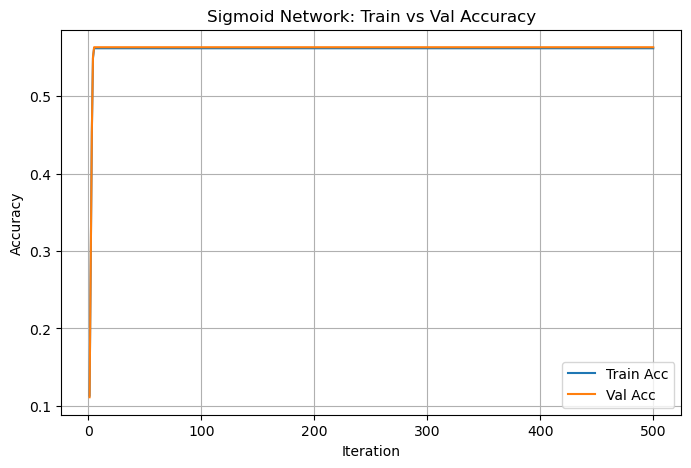

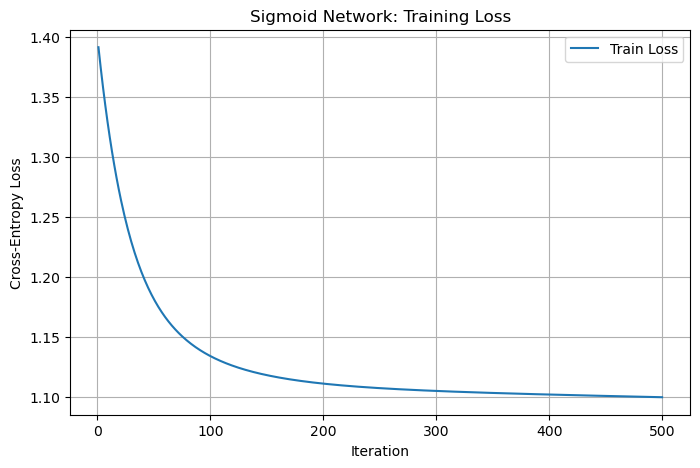

In [9]:
# Plot sigmoid model training and validation accuracy along with training loss.
plot_accuracy(train_acc_sigmoid, val_acc_sigmoid, "Sigmoid Network: Train vs Val Accuracy")
plot_loss(loss_sigmoid, "Sigmoid Network: Training Loss")

In [10]:
# Define ReLU-network architecture, initialization, forward pass, and backward pass.
lr_relu = 0.01
np.random.seed(42)

def relu(x):
    return np.maximum(0.0, x)

def init_params_relu(D, H1, H2, C):

    return {
        "W1": np.random.randn(D, H1) * np.sqrt(2.0 / D),
        "b1": np.zeros((1, H1)),
        "W2": np.random.randn(H1, H2) * np.sqrt(2.0 / H1),
        "b2": np.zeros((1, H2)),
        "W3": np.random.randn(H2, C) * np.sqrt(1.0 / H2),
        "b3": np.zeros((1, C)),
    }

def forward_relu(X, p):
    z1 = X @ p["W1"] + p["b1"]
    a1 = relu(z1)
    z2 = a1 @ p["W2"] + p["b2"]
    a2 = relu(z2)
    logits = a2 @ p["W3"] + p["b3"]
    probs = softmax(logits)
    return probs, {"X": X, "z1": z1, "a1": a1, "z2": z2, "a2": a2, "probs": probs}

def backward_relu(p, cache, y_idx):
    X, z1, a1, z2, a2, probs = cache["X"], cache["z1"], cache["a1"], cache["z2"], cache["a2"], cache["probs"]
    n = X.shape[0]

    dlogits = probs.copy()
    dlogits[np.arange(n), y_idx] -= 1.0
    dlogits /= n

    dW3 = a2.T @ dlogits
    db3 = np.sum(dlogits, axis=0, keepdims=True)

    da2 = dlogits @ p["W3"].T
    dz2 = da2 * (z2 > 0)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ p["W2"].T
    dz1 = da1 * (z1 > 0)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}

In [11]:
# Train the ReLU model with batch gradient descent and track metrics and gradient magnitudes.
params_relu = init_params_relu(D, H1, H2, C)

train_acc_relu, val_acc_relu, loss_relu = [], [], []
gradmag_W1_relu, gradmag_W2_relu = [], []

for it in range(1, num_iters + 1):
    probs_tr, cache = forward_relu(X_tr, params_relu)
    loss = cross_entropy_loss(probs_tr, y_tr_idx)
    grads = backward_relu(params_relu, cache, y_tr_idx)


    gradmag_W1_relu.append(np.mean(np.abs(grads["dW1"])))
    gradmag_W2_relu.append(np.mean(np.abs(grads["dW2"])))


    for k in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        params_relu[k] -= lr_relu * grads["d" + k]

    tr_acc = accuracy_from_probs(forward_relu(X_tr, params_relu)[0], y_tr_idx)
    va_acc = accuracy_from_probs(forward_relu(X_val, params_relu)[0], y_val_idx)

    train_acc_relu.append(tr_acc)
    val_acc_relu.append(va_acc)
    loss_relu.append(loss)

    if it == 1 or it % 20 == 0 or it == num_iters:
        print(f"[ReLU] Iter {it:3d}/{num_iters} | loss={loss:.4f} | train_acc={tr_acc:.4f} | val_acc={va_acc:.4f}")

train_acc_relu = np.array(train_acc_relu)
val_acc_relu = np.array(val_acc_relu)
loss_relu = np.array(loss_relu)
gradmag_W1_relu = np.array(gradmag_W1_relu)
gradmag_W2_relu = np.array(gradmag_W2_relu)

print(f"\nFinal ReLU -> Train Acc: {train_acc_relu[-1]:.4f}, Val Acc: {val_acc_relu[-1]:.4f}")

[ReLU] Iter   1/500 | loss=1.3175 | train_acc=0.4600 | val_acc=0.4571
[ReLU] Iter  20/500 | loss=1.2255 | train_acc=0.4933 | val_acc=0.4900
[ReLU] Iter  40/500 | loss=1.1540 | train_acc=0.5140 | val_acc=0.5160
[ReLU] Iter  60/500 | loss=1.0959 | train_acc=0.5353 | val_acc=0.5358
[ReLU] Iter  80/500 | loss=1.0457 | train_acc=0.5629 | val_acc=0.5617
[ReLU] Iter 100/500 | loss=1.0009 | train_acc=0.5913 | val_acc=0.5918
[ReLU] Iter 120/500 | loss=0.9601 | train_acc=0.6114 | val_acc=0.6155
[ReLU] Iter 140/500 | loss=0.9225 | train_acc=0.6329 | val_acc=0.6356
[ReLU] Iter 160/500 | loss=0.8877 | train_acc=0.6494 | val_acc=0.6541
[ReLU] Iter 180/500 | loss=0.8555 | train_acc=0.6648 | val_acc=0.6686
[ReLU] Iter 200/500 | loss=0.8258 | train_acc=0.6784 | val_acc=0.6825
[ReLU] Iter 220/500 | loss=0.7985 | train_acc=0.6909 | val_acc=0.6931
[ReLU] Iter 240/500 | loss=0.7733 | train_acc=0.7033 | val_acc=0.7039
[ReLU] Iter 260/500 | loss=0.7502 | train_acc=0.7136 | val_acc=0.7128
[ReLU] Iter 280/500 

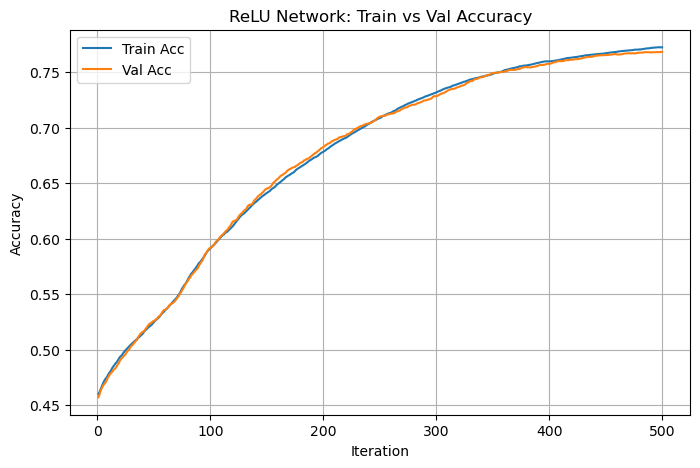

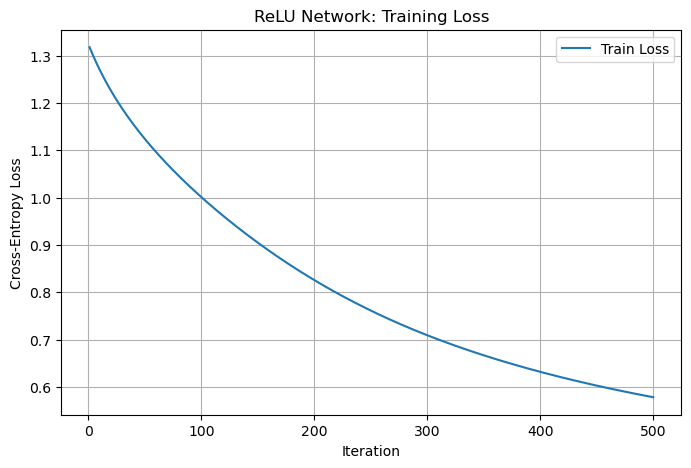

In [12]:
# Plot ReLU model training and validation accuracy along with training loss.
plot_accuracy(train_acc_relu, val_acc_relu, "ReLU Network: Train vs Val Accuracy")
plot_loss(loss_relu, "ReLU Network: Training Loss")

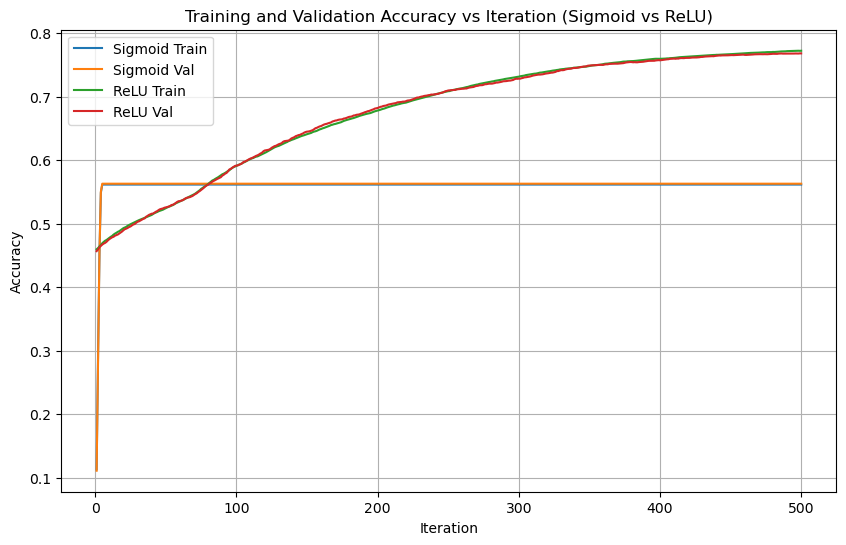


Gradient-flow note:
- Sigmoid saturates near 0/1, so derivatives become small and gradients can vanish in deeper paths.
- ReLU has derivative 1 for positive activations, so gradients usually flow better and optimization is often faster.


In [13]:
# Plot combined sigmoid vs ReLU accuracy curves and print a brief gradient-flow note.
plot_combined_accuracy(train_acc_sigmoid, val_acc_sigmoid, train_acc_relu, val_acc_relu)

print("\nGradient-flow note:")
print("- Sigmoid saturates near 0/1, so derivatives become small and gradients can vanish in deeper paths.")
print("- ReLU has derivative 1 for positive activations, so gradients usually flow better and optimization is often faster.")

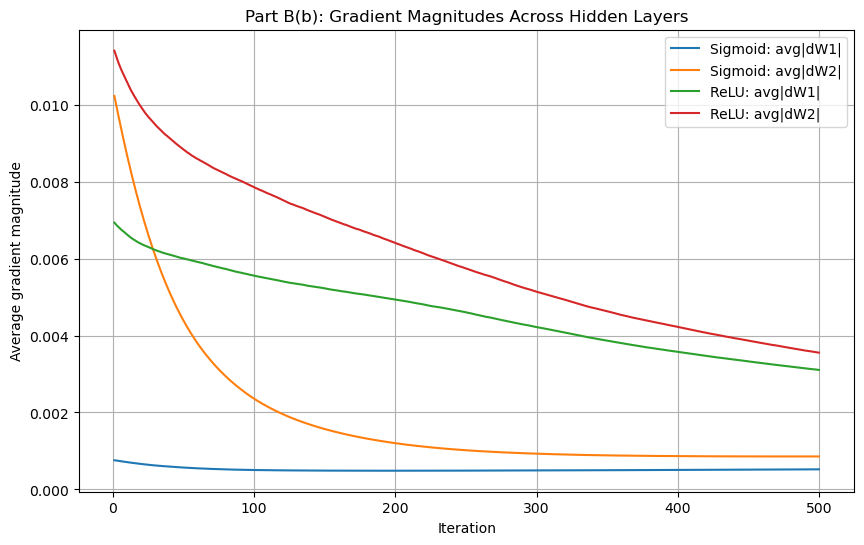


Sigmoid gradient stats:
mean|dW1|=5.1665e-04, final|dW1|=5.2227e-04
mean|dW2|=1.8829e-03, final|dW2|=8.5726e-04
mean(|dW2|/|dW1|)=3.4116

ReLU gradient stats:
mean|dW1|=4.6164e-03, final|dW1|=3.1061e-03
mean|dW2|=6.0829e-03, final|dW2|=3.5552e-03
mean(|dW2|/|dW1|)=1.2916

Observation:
- Sigmoid typically shows smaller early-layer gradients (vanishing tendency), slowing optimization in deeper paths.
- ReLU usually keeps larger gradients in hidden layers, improving gradient flow and learning speed.


In [14]:
# Compare hidden-layer gradient magnitudes for sigmoid and ReLU and print summary statistics.
iters = np.arange(1, len(gradmag_W1_sigmoid) + 1)

plt.figure(figsize=(10, 6))
plt.plot(iters, gradmag_W1_sigmoid, label="Sigmoid: avg|dW1|")
plt.plot(iters, gradmag_W2_sigmoid, label="Sigmoid: avg|dW2|")
plt.plot(iters, gradmag_W1_relu, label="ReLU: avg|dW1|")
plt.plot(iters, gradmag_W2_relu, label="ReLU: avg|dW2|")
plt.xlabel("Iteration")
plt.ylabel("Average gradient magnitude")
plt.title("Part B(b): Gradient Magnitudes Across Hidden Layers")
plt.legend()
plt.grid(True)
plt.show()

def grad_stats(name, g1, g2):
    print(f"\n{name} gradient stats:")
    print(f"mean|dW1|={g1.mean():.4e}, final|dW1|={g1[-1]:.4e}")
    print(f"mean|dW2|={g2.mean():.4e}, final|dW2|={g2[-1]:.4e}")
    print(f"mean(|dW2|/|dW1|)={(g2/(g1 + 1e-12)).mean():.4f}")

grad_stats("Sigmoid", gradmag_W1_sigmoid, gradmag_W2_sigmoid)
grad_stats("ReLU", gradmag_W1_relu, gradmag_W2_relu)

print("\nObservation:")
print("- Sigmoid typically shows smaller early-layer gradients (vanishing tendency), slowing optimization in deeper paths.")
print("- ReLU usually keeps larger gradients in hidden layers, improving gradient flow and learning speed.")

In [15]:
# Rebuild an aligned test feature matrix from processed test data with schema diagnostics.
train_cols = list(X_train_df.columns)
raw_test = X_test_processed_df.copy()

X_test_eval_df = pd.DataFrame(index=raw_test.index)

missing_cols = []
ambiguous_cols = []

for col in train_cols:
    if col in raw_test.columns:
        X_test_eval_df[col] = raw_test[col]
    else:

        matches = [c for c in raw_test.columns if c.split("__", 1)[-1] == col]
        if len(matches) == 1:
            X_test_eval_df[col] = raw_test[matches[0]]
        elif len(matches) > 1:
            ambiguous_cols.append((col, matches))
            X_test_eval_df[col] = 0.0
        else:
            missing_cols.append(col)
            X_test_eval_df[col] = 0.0


extra_cols = [c for c in raw_test.columns if c not in train_cols and c.split("__", 1)[-1] not in train_cols]
print("Aligned test shape:", X_test_eval_df.shape)
print("Train/Test schema identical:", list(X_test_eval_df.columns) == train_cols)
print("Missing train cols filled with 0:", len(missing_cols))
print("Ambiguous mapped cols (filled with 0):", len(ambiguous_cols))
print("Unused extra raw test cols:", len(extra_cols))

if ambiguous_cols:
    print("\nAmbiguous columns detected:")
    for base_col, matches in ambiguous_cols:
        print(f"  {base_col} <- {matches}")

display(X_test_eval_df.head())

Aligned test shape: (7297, 12)
Train/Test schema identical: True
Missing train cols filled with 0: 0
Ambiguous mapped cols (filled with 0): 0
Unused extra raw test cols: 1


,minimum_nights,number_of_reviews,amenity_score,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.466136,1.836031,1.678579,1.216107,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.678632,-1.313723,1.429437,0.496606,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.130370,0.562597,2.342956,-0.353018,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.130370,-0.600545,1.320437,-0.850545,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.466136,0.849418,-1.207312,0.527223,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [16]:
# Generate sigmoid test predictions and print test accuracy with a classification report.
X_test_eval = X_test_eval_df.to_numpy(dtype=np.float32)

probs_test, _ = forward_sigmoid(X_test_eval, params_sigmoid)
y_pred_idx = np.argmax(probs_test, axis=1)

idx_to_class = {i: c for i, c in enumerate(classes)}
y_pred = np.vectorize(idx_to_class.get)(y_pred_idx)

print("Sigmoid Test Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report (Sigmoid):")
print(classification_report(y_test, y_pred, digits=4))

Sigmoid Test Accuracy: 0.5631

Classification Report (Sigmoid):
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       983
           1     0.5631    1.0000    0.7205      4109
           2     0.0000    0.0000    0.0000      1737
           3     0.0000    0.0000    0.0000       468

    accuracy                         0.5631      7297
   macro avg     0.1408    0.2500    0.1801      7297
weighted avg     0.3171    0.5631    0.4057      7297



/home/danishzaheer/miniconda3/envs/foundation_AI/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/danishzaheer/miniconda3/envs/foundation_AI/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/danishzaheer/miniconda3/envs/foundation_AI/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [17]:
# Print additional sigmoid evaluation metrics including class count distributions.
print("Sigmoid Test Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred, digits=4, zero_division=0))
print("True counts:", np.bincount(y_test))
print("Pred counts:", np.bincount(y_pred))

Sigmoid Test Accuracy: 0.5631
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       983
           1     0.5631    1.0000    0.7205      4109
           2     0.0000    0.0000    0.0000      1737
           3     0.0000    0.0000    0.0000       468

    accuracy                         0.5631      7297
   macro avg     0.1408    0.2500    0.1801      7297
weighted avg     0.3171    0.5631    0.4057      7297

True counts: [ 983 4109 1737  468]
Pred counts: [   0 7297]


In [18]:
# Generate ReLU test predictions and print test accuracy with a classification report.
probs_test_relu, _ = forward_relu(X_test_eval, params_relu)
y_pred_idx_relu = np.argmax(probs_test_relu, axis=1)

idx_to_class = {i: c for i, c in enumerate(classes)}
y_pred_relu = np.vectorize(idx_to_class.get)(y_pred_idx_relu)

print("ReLU Test Accuracy:", round(accuracy_score(y_test, y_pred_relu), 4))
print("\nClassification Report (ReLU):")
print(classification_report(y_test, y_pred_relu, digits=4))

ReLU Test Accuracy: 0.4374

Classification Report (ReLU):
              precision    recall  f1-score   support

           0     0.2621    0.1923    0.2218       983
           1     0.5647    0.5700    0.5673      4109
           2     0.2791    0.3805    0.3220      1737
           3     0.0000    0.0000    0.0000       468

    accuracy                         0.4374      7297
   macro avg     0.2765    0.2857    0.2778      7297
weighted avg     0.4198    0.4374    0.4260      7297



In [19]:
# Print true and predicted class count distributions for ReLU predictions.
print("True counts:", np.bincount(y_test))
print("Pred counts (ReLU):", np.bincount(y_pred_relu))

True counts: [ 983 4109 1737  468]
Pred counts (ReLU): [ 721 4147 2368   61]
